In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# loading the dataset to a Pandas DataFrame
link =  'https://drive.google.com/file/d/1y2g5lIU9bLcDBoafJXD9ORKQoAm4hCqj/view?usp=sharing'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('primary_account(2).csv')

data = pd.read_csv('primary_account(2).csv', sep = ',')

# Exploratory Data Analysis

In [4]:
data.shape

(19, 5)

In [5]:
data.head(10)

,id,amount,available_balance,primary_account_id,Class
0,15,133,1000.0,11,0
1,17,10,990.0,11,1
2,19,170,6545.0,11,0
3,21,10,6535.0,11,1
4,23,100,6435.0,11,0
5,28,55,6446.0,11,0
6,33,10,6456.0,11,0
7,35,10,6466.0,11,0
8,37,67,6399.0,11,1
9,39,8,6391.0,11,0


In [6]:
data.describe()

,id,amount,available_balance,primary_account_id,Class
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,37.736842,49.368421,3720.105263,10.210526,0.210526
std,14.328845,50.993693,3001.704495,11.291978,0.418854
min,15.000000,5.000000,10.000000,1.000000,0.000000
25%,25.500000,10.000000,967.500000,2.000000,0.000000
50%,39.000000,10.000000,6391.000000,11.000000,0.000000
75%,47.500000,83.500000,6461.000000,11.000000,0.000000
max,61.000000,170.000000,6547.000000,53.000000,1.000000


In [7]:
cor1= data.corr() 

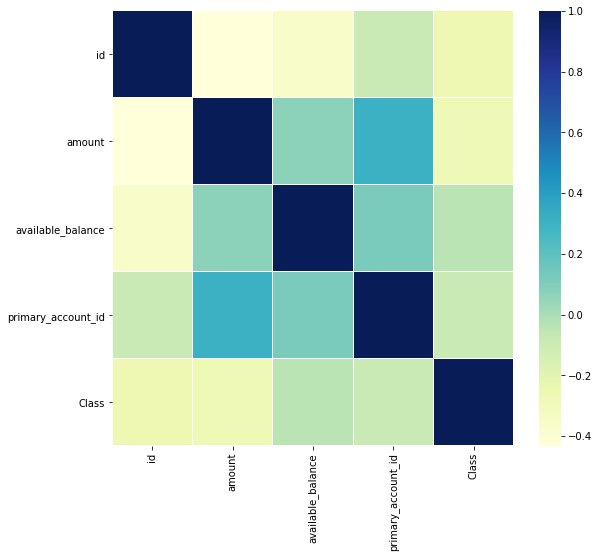

In [8]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cor1, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# DATA PREPROCESSING

In [9]:
data.dtypes == object
# Checking for Character Data Type

id                    False
amount                False
available_balance     False
primary_account_id    False
Class                 False
dtype: bool

In [10]:
data.columns

Index(['id', 'amount', 'available_balance', 'primary_account_id', 'Class'], dtype='object')

In [11]:
data.std() 
#Checking for Variance 

id                      14.328845
amount                  50.993693
available_balance     3001.704495
primary_account_id      11.291978
Class                    0.418854
dtype: float64

In [12]:
data.isnull().sum()
# To check whether the dataset has missing values 

id                    0
amount                0
available_balance     0
primary_account_id    0
Class                 0
dtype: int64

In [13]:
data["Class"].value_counts()

0    15
1     4
Name: Class, dtype: int64

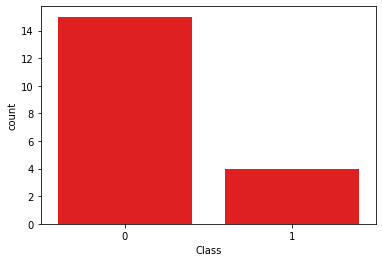

In [14]:
sns.countplot(x= "Class", data = data, color = "red")
#checking for imbalance on the dependent Variable 

In [15]:
sns.distplot(data["Time"], bins = 20, color = "purple")
sns.set(style = "darkgrid")

KeyError: ignored

In [ ]:
sns.distplot(data["amount"], bins = 20 , color = "yellow")
sns.set(style = "white")

# Standardization of Continuous Variables 

In [16]:
from sklearn import preprocessing 
# Scaling the numerical Values as they are in different scales

In [17]:
numerical_val = list(set(data[["Time","Amount"]]))

KeyError: ignored

In [18]:
new_col = [i+ "_ Standardized" for i in numerical_val]

NameError: ignored

In [19]:
array = data[numerical_val].values

NameError: ignored

In [ ]:
data_scaler = preprocessing.StandardScaler().fit(array)

In [ ]:
data[new_col] = pd.DataFrame(data_scaler.transform(array))

In [ ]:
data.columns # New standardized columns are added 

In [ ]:
data = data.drop(numerical_val, axis =1) 

In [ ]:
data.mean()

In [ ]:
round(3.202236e-16) #Mean of the new standardised variable should be zero

In [ ]:
round(-1.050379e-14)

In [ ]:
data["Amount_ Standardized"].std()

In [ ]:
data["Time_ Standardized"].std()

In [ ]:
# Splitting up the data Randomly 

In [21]:
from sklearn.model_selection import train_test_split
input_vari = list(set(data.columns)- set(["Class"]))
X = data[input_vari]
Y = data["Class"]

In [22]:
X

,amount,primary_account_id,id,available_balance
0,133,11,15,1000.0
1,10,11,17,990.0
2,170,11,19,6545.0
3,10,11,21,6535.0
4,100,11,23,6435.0
5,55,11,28,6446.0
6,10,11,33,6456.0
7,10,11,35,6466.0
8,67,11,37,6399.0
9,8,11,39,6391.0


In [23]:
Y

0     0
1     1
2     0
3     1
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    0
Name: Class, dtype: int64

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 60)

In [26]:
X_train

,amount,primary_account_id,id,available_balance
5,55,11,28,6446.0
15,100,53,49,1000.0
7,10,11,35,6466.0
11,104,2,43,1000.0
2,170,11,19,6545.0
17,10,11,59,6537.0
9,8,11,39,6391.0
8,67,11,37,6399.0
3,10,11,21,6535.0
10,66,11,41,6547.0


In [27]:
Y_train

5     0
15    0
7     0
11    0
2     0
17    0
9     0
8     1
3     1
10    0
6     0
1     1
13    0
Name: Class, dtype: int64

In [29]:
X1= pd.DataFrame(X_train, columns = input_vari)
Y1 = pd.DataFrame(Y_train, columns = ["Class"])
data_train = pd.concat([X1,Y1], axis = 1)

In [30]:
data_train.shape #Shape Before SMOTE

(13, 5)

In [31]:
data.shape # Original Data Shape

(19, 5)

In [32]:
data_train.to_csv("data_train_before_smote.csv") 

In [33]:
X_test

,amount,primary_account_id,id,available_balance
14,5,1,48,20.0
16,10,2,57,935.0
18,10,1,61,10.0
12,55,2,45,945.0
4,100,11,23,6435.0
0,133,11,15,1000.0


In [34]:
X_test.columns #Checking Column Names

Index(['amount', 'primary_account_id', 'id', 'available_balance'], dtype='object')

In [35]:
Y_test

14    1
16    0
18    0
12    0
4     0
0     0
Name: Class, dtype: int64

In [36]:
A1= pd.DataFrame(X_test, columns = input_vari)
B1 = pd.DataFrame(Y_test, columns = ["Class"])
data_test = pd.concat([A1,B1], axis = 1)

In [37]:
data_test

,amount,primary_account_id,id,available_balance,Class
14,5,1,48,20.0,1
16,10,2,57,935.0,0
18,10,1,61,10.0,0
12,55,2,45,945.0,0
4,100,11,23,6435.0,0
0,133,11,15,1000.0,0


In [38]:
data_test.to_csv("test_data_set.csv")

In [39]:
data_test["Class"].value_counts()

0    5
1    1
Name: Class, dtype: int64

In [40]:
data_train["Class"].value_counts()

0    10
1     3
Name: Class, dtype: int64

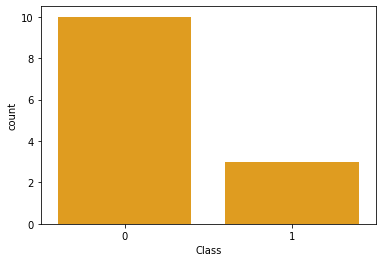

In [41]:
sns.countplot(x = "Class" , data = data_train , color = "orange") 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

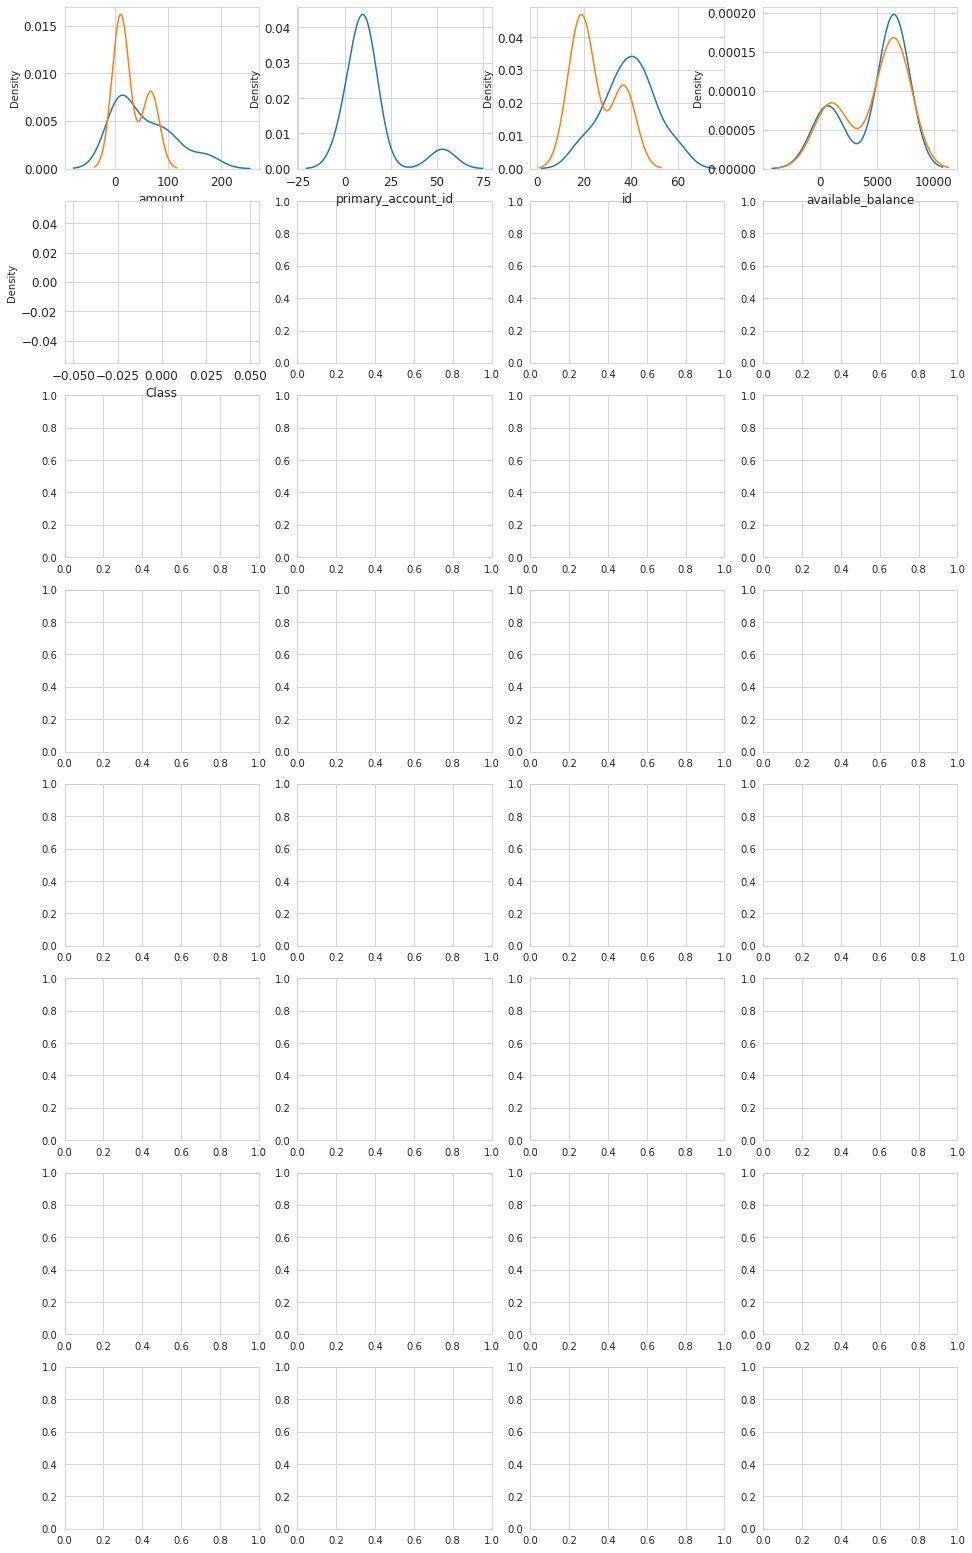

In [42]:
var = data_train.columns.values

i = 0
t0 = data_train.loc[data_train['Class'] == 0]
t1 = data_train.loc[data_train['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#Credit : https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models

In [43]:
# While we a get a high accuracy of 95% on our Testing data
# Accuracy is not the only way to evalutate the model 
# Precision and recall are other ways to get the model performance
# Credit : https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
# If the data is imbalanced Precision and Recall is a better way to measure performance 
# http://www.davidsbatista.net/blog/2018/08/19/NLP_Metrics/
# https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba
# Since the testing dataset is highly imbalanced We should use Precision and Recall
# Precision is a good measure to determine, when the costs of False Positive is high. 

# Decision Tree Model 

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [64]:
X_train

,amount,primary_account_id,id,available_balance
5,55,11,28,6446.0
15,100,53,49,1000.0
7,10,11,35,6466.0
11,104,2,43,1000.0
2,170,11,19,6545.0
17,10,11,59,6537.0
9,8,11,39,6391.0
8,67,11,37,6399.0
3,10,11,21,6535.0
10,66,11,41,6547.0


In [65]:
Y_train

5     0
15    0
7     0
11    0
2     0
17    0
9     0
8     1
3     1
10    0
6     0
1     1
13    0
Name: Class, dtype: int64

In [66]:
dt = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 5) 
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
pred_y_train = dt.predict(X_train)
pred_Y_train_proba = dt.predict_proba(X_test)

In [68]:
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.05):
    y_pred = (pred_Y_train_proba [:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train,pred_y_train).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [69]:
table # Threshold at 0.5

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.00,1.0,1.0,1.0,1.0,1.0,1.0
0.05,1.0,1.0,1.0,1.0,1.0,1.0
0.10,1.0,1.0,1.0,1.0,1.0,1.0
0.15,1.0,1.0,1.0,1.0,1.0,1.0
0.20,1.0,1.0,1.0,1.0,1.0,1.0
0.25,1.0,1.0,1.0,1.0,1.0,1.0
0.30,1.0,1.0,1.0,1.0,1.0,1.0
0.35,1.0,1.0,1.0,1.0,1.0,1.0
0.40,1.0,1.0,1.0,1.0,1.0,1.0
0.45,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

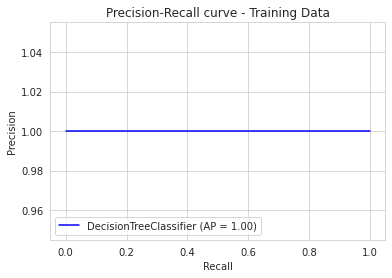

In [70]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(dt, X_train, Y_train, color = "blue")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for unbalanced Train Data

Testing the new model on the Testing DataSet

In [71]:
pred_y = dt.predict(X_test)

In [72]:
pred_Y_test_proba = dt.predict_proba(X_test)

In [73]:
pred_prob_y = pred_Y_test_proba[:,1]

In [74]:
y_test_pred = (pred_prob_y > 0.5).astype(int) #Threshold selected Based on the above precision vs recall curve

In [75]:
tn, fp, fn, tp = confusion_matrix(Y_test,y_test_pred).ravel()

In [76]:
tn, fp, fn, tp #Similar result as the previous model

(5, 0, 1, 0)

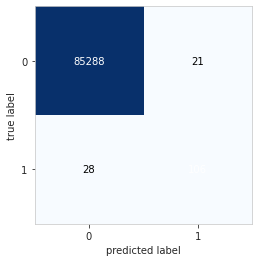

In [77]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[85288, 21],[28, 106]])
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

Now we check the Precision and Recall metrics of our new model 

In [78]:
precision, recall, threshold = precision_recall_curve(Y_test,pred_y)

In [79]:
precision, recall, threshold # As you can see there is a drastic improvement in our precision metric.

(array([0.16666667, 1.        ]), array([1., 0.]), array([0]))

Text(0.5, 1.0, 'Precision-Recall curve - Testing Data')

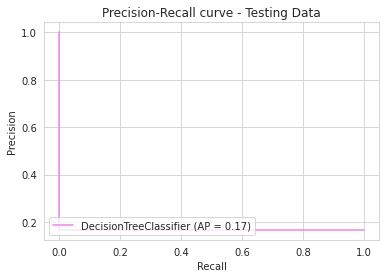

In [80]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(dt, X_test, Y_test, color = "violet")
disp.ax_.set_title('Precision-Recall curve - Testing Data') 
#Precision vs Recall Curve for Test

In [81]:
# We continue to find the best classification model without balancing the dataset and by using Precision and recall as the metric of measure.

# Logistic Regression Model

In [106]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [107]:
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [108]:
pred_Y_lr = lr.predict(X_train)

In [109]:
pred_Y_lr_proba = lr.predict_proba(X_train)

In [110]:
lr_proba = pred_Y_lr_proba[:,1]

In [111]:
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table2 = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.05):
    y_pred = (pred_Y_lr_proba [:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train,y_pred).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table2.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [112]:
table2

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.00,0.230769,1.000000,0.0,0.230769,1.000000,0.375000
0.05,0.538462,1.000000,0.4,0.333333,1.000000,0.500000
0.10,0.538462,0.666667,0.5,0.285714,0.666667,0.400000
0.15,0.615385,0.666667,0.6,0.333333,0.666667,0.444444
0.20,0.615385,0.666667,0.6,0.333333,0.666667,0.444444
0.25,0.769231,0.666667,0.8,0.500000,0.666667,0.571429
0.30,0.923077,0.666667,1.0,1.000000,0.666667,0.800000
0.35,0.923077,0.666667,1.0,1.000000,0.666667,0.800000
0.40,0.923077,0.666667,1.0,1.000000,0.666667,0.800000
0.45,0.923077,0.666667,1.0,1.000000,0.666667,0.800000


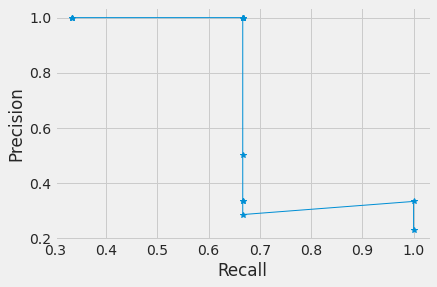

In [113]:
plt.plot(table2.Recall, table2.Precision , marker = "*", linewidth = 1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.style.use("fivethirtyeight")
plt.show()
# Plot between Precision and Recall 

In [114]:
#Based on the above table we can select a threshold of 0.5

Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

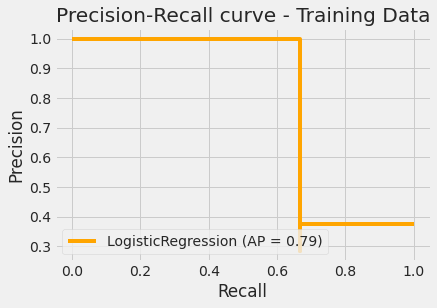

In [115]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr, X_train, Y_train, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train

In [116]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [117]:
precision, recall, threshold = precision_recall_curve(Y_train,pred_Y_lr)

In [118]:
precision, recall, threshold

(array([0.23076923, 1.        , 1.        ]),
 array([1.        , 0.66666667, 0.        ]),
 array([0, 1]))

In [119]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [120]:
precision, recall, _ = precision_recall_curve(Y_train, pred_Y_lr)
auc_score = auc(recall, precision)
print('Logistic Regression AUC: %.3f' % auc_score)

Logistic Regression AUC: 0.872


In [121]:
pred_Y_lr_test = lr.predict(X_test)

In [122]:
pred_Y_lr_test_proba = lr.predict_proba(X_test)

In [123]:
lr_proba_test = pred_Y_lr_test_proba[:,1]

In [124]:
tn, fp, fn, tp = confusion_matrix(Y_test,pred_Y_lr_test).ravel()

In [125]:
tn, fp, fn, tp

(4, 1, 1, 0)

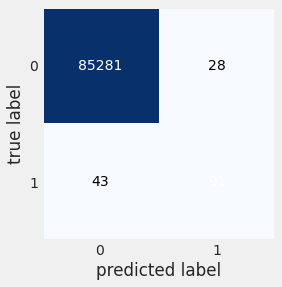

In [126]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[85281, 28],[43, 91]])
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [127]:
precision, recall, threshold = precision_recall_curve(Y_test,pred_Y_lr_test)

In [128]:
precision, recall, threshold

(array([0.16666667, 0.        , 1.        ]),
 array([1., 0., 0.]),
 array([0, 1]))

Text(0.5, 1.0, 'Precision-Recall curve - Test Data')

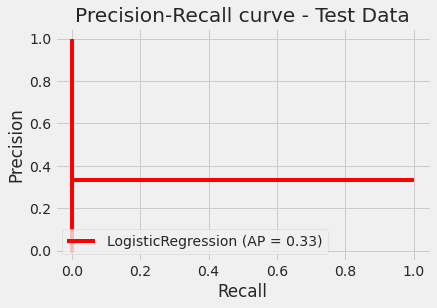

In [129]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr, X_test, Y_test, color = "red")
disp.ax_.set_title('Precision-Recall curve - Test Data') 
#Precision vs Recall Curve for Test Data

# Random Forest

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train

,V28,V1,V8,V15,V7,V21,V4,Time_ Standardized,V22,V25,...,V19,V20,V18,V16,V14,V12,V23,V11,V27,V13
19882,0.019545,1.223084,-0.117419,0.015495,-0.508023,0.252644,-0.656490,-1.351726,0.463601,0.414817,...,0.707894,0.214134,-0.939646,1.249910,0.076379,0.159828,-0.092708,1.629016,-0.012273,0.063098
28627,0.376354,-2.738265,-0.332107,0.322808,0.855199,-0.060815,-0.792852,-1.257724,0.090349,-0.057352,...,-0.895217,0.205705,-0.599378,0.254932,-0.775479,0.845622,0.113117,-0.165012,-0.902677,1.540066
252282,-0.023058,1.941172,-0.496164,1.134597,0.156930,-0.146344,-2.651533,1.282894,-0.100191,0.297133,...,0.238295,-0.288116,1.212992,-2.868543,0.603560,0.309101,-0.060454,-0.781103,-0.000465,-0.174029
283094,1.240884,-10.243984,3.746472,-0.837132,-2.164932,-0.996068,-2.460064,1.612113,-1.425127,1.492283,...,-0.428189,3.406673,-0.172658,0.660813,0.303558,2.152466,0.660345,-0.552959,2.177236,0.837591
201431,0.500579,-3.118979,-16.942606,0.747486,-9.120091,-8.728597,-0.978949,0.822757,2.958235,-0.018582,...,-1.423249,4.412495,0.487832,1.390717,2.856969,1.987735,1.255257,-0.790111,-0.005474,-1.597984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,-0.043576,2.104735,0.175389,0.173482,-1.656851,0.488025,-1.009783,1.361524,1.507397,-0.403562,...,0.427254,0.065773,-0.251647,1.957444,-0.812430,0.676295,0.149724,0.873711,0.058842,1.510768
64162,-0.030211,-0.471512,0.840939,2.043929,0.002159,0.310285,0.857215,-0.921450,0.977923,-0.495253,...,-1.329392,-0.302997,-1.935302,-1.511864,0.762662,0.563880,0.093360,0.608457,0.030910,-0.029949
174179,-0.098112,2.126687,0.052156,0.066012,-0.087291,0.442502,-1.422633,0.568462,1.293620,0.315080,...,0.139524,-0.036445,-2.318056,-0.023609,0.565906,0.117809,-0.064980,1.142851,-0.041218,0.232185
268687,-0.062229,2.060501,-0.271768,0.162736,0.108868,-0.301496,0.429631,1.443060,-0.789625,-0.337683,...,0.150298,-0.296357,-0.734568,-0.055036,0.499747,-0.156386,0.354650,-0.924880,-0.078106,-1.061793


In [ ]:
Y_train

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

In [ ]:
X_test

,V28,V1,V8,V15,V7,V21,V4,Time_ Standardized,V22,V25,...,V19,V20,V18,V16,V14,V12,V23,V11,V27,V13
259433,-0.331451,-0.763085,-0.865043,-0.299823,-0.317032,0.578154,2.324735,1.354027,0.207495,0.242397,...,2.853027,0.115547,0.170294,-1.728057,-1.484028,0.247109,-0.281702,-1.453601,-0.141732,0.165142
227002,-0.291331,-1.108486,0.075183,0.506785,1.457932,0.448833,-0.848797,1.054584,1.455308,0.733008,...,-1.083420,-0.401661,-1.589495,-2.026251,1.215360,-0.317460,-0.698171,-0.547704,-0.258377,-1.409582
251070,-0.046461,1.870897,-0.140235,-1.577461,0.203307,0.101600,3.947951,1.271544,0.491255,0.141246,...,-1.428012,-0.228282,-0.720885,0.348085,-0.171709,0.371409,0.064040,-1.295457,-0.020601,0.751318
139521,0.145102,-2.957914,0.770526,2.329116,-2.390253,0.506660,-0.809990,-0.244795,0.686935,0.013191,...,-1.243014,0.943083,-1.235610,-1.895343,-0.137933,-0.961439,0.993696,0.523432,-0.005766,-0.035951
200788,-0.105054,2.140080,-0.306500,-0.689785,0.755034,0.255365,0.176678,0.816292,0.762966,0.695226,...,0.552268,-0.293807,0.263638,-0.318070,1.336235,-0.359194,-0.222853,0.020210,-0.145902,-1.896512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157536,-0.065529,2.036142,-0.161290,-0.405404,-0.113620,0.155445,0.298705,0.320420,0.745847,0.248627,...,-0.112781,-0.340792,1.013496,-0.057697,2.357899,-2.167954,0.035655,1.747279,-0.035013,0.354799
42920,0.005636,1.218705,-0.101830,1.243708,0.026948,0.033700,0.579985,-1.126933,0.143778,0.368969,...,-0.642177,-0.193914,-0.832018,-0.219660,0.501986,0.017113,0.022221,0.085181,-0.036199,-0.669037
26195,0.283098,-0.734036,0.348135,0.426360,-0.785410,0.244730,1.379820,-1.281730,0.702957,-1.290582,...,0.156111,0.182743,-0.219903,-0.608182,-0.323272,0.412283,0.362454,-0.766117,0.310683,0.128284
84510,0.016326,1.164761,0.117051,0.714861,-0.133083,-0.214057,0.535220,-0.725990,-0.656455,0.091323,...,-0.262754,-0.136052,-0.174180,0.413178,0.062793,0.674040,0.151210,1.744074,-0.015027,-0.505368


In [ ]:
Y_test

259433    0
227002    0
251070    0
139521    0
200788    0
         ..
157536    0
42920     0
26195     0
84510     0
29917     0
Name: Class, Length: 85443, dtype: int64

In [ ]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
rf1 = RandomForestClassifier(n_estimators=2, max_depth=5, random_state=0)
rf1.fit(X_train, Y_train)

rf2 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf2.fit(X_train, Y_train)

rf3 = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=0)
rf3.fit(X_train, Y_train)

rf4 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=0)
rf4.fit(X_train, Y_train)

rf5 = RandomForestClassifier(n_estimators=25, max_depth=5, random_state=0)
rf5.fit(X_train, Y_train)

rf6 = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=0)
rf6.fit(X_train, Y_train)

rf7 = RandomForestClassifier(n_estimators=35, max_depth=5, random_state=0)
rf7.fit(X_train, Y_train)

rf8 = RandomForestClassifier(n_estimators=40, max_depth=5, random_state=0)
rf8.fit(X_train, Y_train)

rf9 = RandomForestClassifier(n_estimators=45, max_depth=5, random_state=0)
rf9.fit(X_train, Y_train)

rf10 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
rf10.fit(X_train, Y_train)

rf11 = RandomForestClassifier(n_estimators=75, max_depth=5, random_state=0)
rf11.fit(X_train, Y_train)

rf12 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf12.fit(X_train, Y_train)

rf13 = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=0)
rf13.fit(X_train, Y_train)

rf14 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
rf14.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred_Y_rf1 = rf1.predict(X_test)
pred_Y_rf2 = rf2.predict(X_test)
pred_Y_rf3 = rf3.predict(X_test)
pred_Y_rf4 = rf4.predict(X_test)
pred_Y_rf5 = rf5.predict(X_test)
pred_Y_rf6 = rf6.predict(X_test)
pred_Y_rf7 = rf7.predict(X_test)
pred_Y_rf8 = rf8.predict(X_test)
pred_Y_rf9 = rf9.predict(X_test)
pred_Y_rf10 = rf10.predict(X_test)
pred_Y_rf11 = rf11.predict(X_test)
pred_Y_rf12 = rf12.predict(X_test)
pred_Y_rf13 = rf13.predict(X_test)
pred_Y_rf14 = rf14.predict(X_test)

In [ ]:
accuracy_rf1, sensitivity_rf1, specificity_rf1 = get_performance(Y_test, pred_Y_rf1)
accuracy_rf2, sensitivity_rf2, specificity_rf2 = get_performance(Y_test, pred_Y_rf2)
accuracy_rf3, sensitivity_rf3, specificity_rf3 = get_performance(Y_test, pred_Y_rf3)
accuracy_rf4, sensitivity_rf4, specificity_rf4 = get_performance(Y_test, pred_Y_rf4)
accuracy_rf5, sensitivity_rf5, specificity_rf5 = get_performance(Y_test, pred_Y_rf5)
accuracy_rf6, sensitivity_rf6, specificity_rf6 = get_performance(Y_test, pred_Y_rf6)
accuracy_rf7, sensitivity_rf7, specificity_rf7 = get_performance(Y_test, pred_Y_rf7)
accuracy_rf8, sensitivity_rf8, specificity_rf8 = get_performance(Y_test, pred_Y_rf8)
accuracy_rf9, sensitivity_rf9, specificity_rf9 = get_performance(Y_test, pred_Y_rf9)
accuracy_rf10, sensitivity_rf10, specificity_rf10 = get_performance(Y_test, pred_Y_rf10)
accuracy_rf11, sensitivity_rf11, specificity_rf11 = get_performance(Y_test, pred_Y_rf11)
accuracy_rf12, sensitivity_rf12, specificity_rf12 = get_performance(Y_test, pred_Y_rf12)
accuracy_rf13, sensitivity_rf13, specificity_rf13 = get_performance(Y_test, pred_Y_rf13)
accuracy_rf14, sensitivity_rf14, specificity_rf14 = get_performance(Y_test, pred_Y_rf14)

In [ ]:
perf2 = pd.DataFrame([accuracy_rf1, accuracy_rf2,accuracy_rf3,accuracy_rf4, accuracy_rf5, accuracy_rf6, 
                      accuracy_rf7, accuracy_rf8, accuracy_rf9, accuracy_rf10, accuracy_rf11, accuracy_rf12, 
                      accuracy_rf13,accuracy_rf14], 
                    columns = ['accuracy'], 
                    index = ["RF-1","RF-2","RF-3","RF-4","RF-5","RF-6","RF-7","RF-8","RF-9","RF-10","RF-11","RF-12","RF-13","RF-14",])

perf2['sensitivity'] = np.asarray([sensitivity_rf1,sensitivity_rf2,sensitivity_rf3,sensitivity_rf4,sensitivity_rf5,
                                  sensitivity_rf6, sensitivity_rf7, sensitivity_rf8, sensitivity_rf9, sensitivity_rf10,
                                  sensitivity_rf11,sensitivity_rf12, sensitivity_rf13, sensitivity_rf14])

perf2['specificity'] = np.asarray([specificity_rf1,specificity_rf2, specificity_rf3, specificity_rf4, specificity_rf5,
                                  specificity_rf6,specificity_rf7, specificity_rf8, specificity_rf9, specificity_rf10,
                                   specificity_rf11, specificity_rf12,specificity_rf13, specificity_rf14])

perf2["e"] = np.asarray([2, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 150, 200])

perf2

,accuracy,sensitivity,specificity,e
RF-1,0.999345,0.999754,0.738806,2
RF-2,0.999462,0.999836,0.761194,10
RF-3,0.999438,0.999812,0.761194,15
RF-4,0.999485,0.999848,0.768657,20
RF-5,0.999508,0.999859,0.776119,25
RF-6,0.999473,0.999848,0.761194,30
RF-7,0.999473,0.999836,0.768657,35
RF-8,0.999473,0.999848,0.761194,40
RF-9,0.999473,0.999859,0.753731,45
RF-10,0.999450,0.999848,0.746269,50


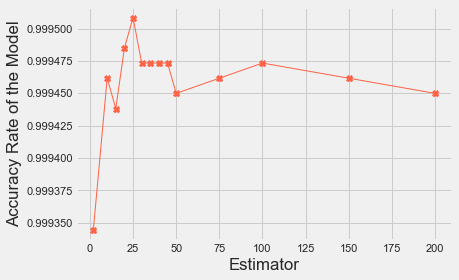

In [ ]:
plt.plot(perf2.e,perf2.accuracy, color = "tomato", marker = "X", linewidth = 1)
plt.xlabel("Estimator")
plt.ylabel("Accuracy Rate of the Model")
plt.style.use("fivethirtyeight")
plt.show()

In [ ]:
# n_estimators = 100 
# This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
# Higher number of trees give you better performance but makes your code slower. 
# You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.
# Here The curve becomes uniform at 100

In [ ]:
#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
pred_Y_rf_train = rf.predict(X_train)

Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

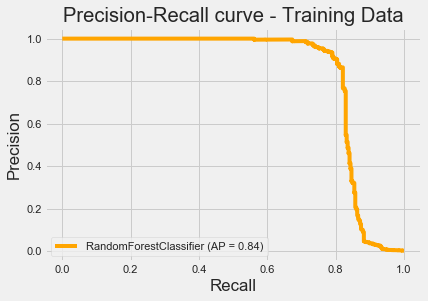

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(rf, X_train, Y_train, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train

In [ ]:
precision, recall, threshold = precision_recall_curve(Y_train,pred_Y_rf_train)

In [ ]:
precision, recall, threshold

(array([0.00179571, 0.95714286, 1.        ]),
 array([1.        , 0.74860335, 0.        ]),
 array([0, 1], dtype=int64))

In [ ]:
pred_Y_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Precision-Recall curve - Testing Data')

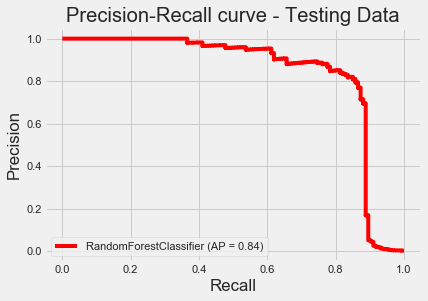

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(rf, X_test, Y_test, color = "red")
disp.ax_.set_title('Precision-Recall curve - Testing Data') 
#Precision vs Recall Curve for Test

In [ ]:
precision, recall, threshold = precision_recall_curve(Y_test,pred_Y_rf)

In [ ]:
precision, recall, threshold

(array([0.0015683 , 0.88695652, 1.        ]),
 array([1.        , 0.76119403, 0.        ]),
 array([0, 1], dtype=int64))

In [ ]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
feature_imp

V17                     0.205326
V12                     0.194338
V14                     0.114315
V10                     0.095798
V11                     0.090729
V16                     0.067364
V9                      0.037789
V18                     0.034623
V4                      0.032265
V7                      0.019202
V3                      0.012590
V26                     0.009788
V1                      0.009017
V8                      0.008444
V21                     0.008262
V2                      0.007376
V6                      0.007300
V20                     0.005963
V27                     0.005409
V5                      0.004874
Time_ Standardized      0.004604
V22                     0.004266
V24                     0.003667
V19                     0.003385
V15                     0.002902
V25                     0.002668
V28                     0.002652
Amount_ Standardized    0.002378
V13                     0.001420
V23                     0.001286
dtype: flo

No handles with labels found to put in legend.


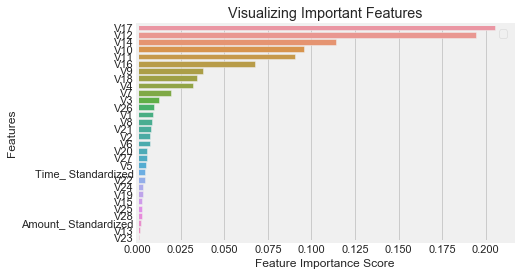

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()

In [ ]:
naive.fit(X_train, Y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
naive_pred = naive.predict(X_train)

In [ ]:
naive_pred_prob = naive.predict_proba(X_train)

In [ ]:
naive_pred_prob[:,1]

array([0.99210177, 0.        , 0.98667819, 0.        , 0.00633373,
       0.2368967 , 0.97237359, 0.94783883, 0.99804115, 0.89864097,
       0.99041567, 0.998698  , 0.        ])

In [ ]:
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table3 = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.05):
    y_pred = (naive_pred_prob[:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train,y_pred).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table3.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [ ]:
table3

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.00,0.461538,1.000000,0.3,0.300000,1.000000,0.461538
0.05,0.538462,1.000000,0.4,0.333333,1.000000,0.500000
0.10,0.538462,1.000000,0.4,0.333333,1.000000,0.500000
0.15,0.538462,1.000000,0.4,0.333333,1.000000,0.500000
0.20,0.538462,1.000000,0.4,0.333333,1.000000,0.500000
0.25,0.615385,1.000000,0.5,0.375000,1.000000,0.545455
0.30,0.615385,1.000000,0.5,0.375000,1.000000,0.545455
0.35,0.615385,1.000000,0.5,0.375000,1.000000,0.545455
0.40,0.615385,1.000000,0.5,0.375000,1.000000,0.545455
0.45,0.615385,1.000000,0.5,0.375000,1.000000,0.545455


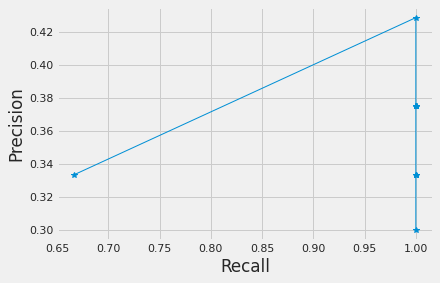

In [ ]:
plt.plot(table3.Recall, table3.Precision , marker = "*", linewidth = 1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.style.use("fivethirtyeight")
plt.show()
# Plot between Precision and Recall 

In [ ]:
naive_pred_test = naive.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test,naive_pred_test).ravel()

In [ ]:
tn, fp, fn, tp #Threshold of 0.5

(3, 2, 1, 0)

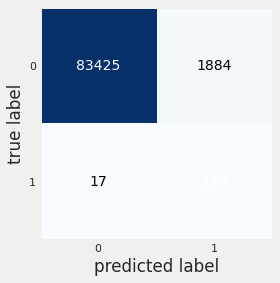

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[83425, 1884],[17, 117]])
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

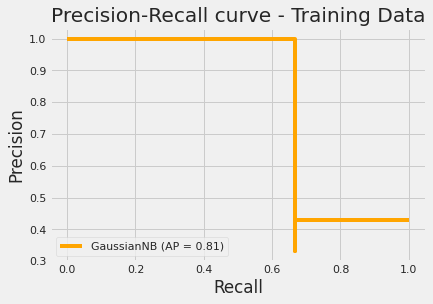

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(naive, X_train, Y_train, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train Data

In [ ]:
precision, recall, threshold = precision_recall_curve(Y_test,naive_pred_test)

In [ ]:
precision, recall, threshold  

(array([0.16666667, 0.        , 1.        ]),
 array([1., 0., 0.]),
 array([0, 1]))

Text(0.5, 1.0, 'Precision-Recall curve - Test Data')

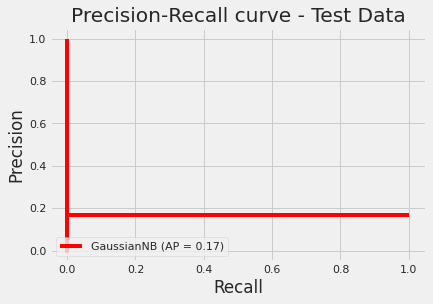

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(naive, X_test, Y_test, color = "red")
disp.ax_.set_title('Precision-Recall curve - Test Data') 
#Precision vs Recall Curve for Test Data

In [ ]:
#Though the Naive Bayes Model performs well interms of Accuracy but it is poor interms of Precsion.

# Performance Summary & Model Selection

In [ ]:
def detailed_stats(X_test, Y_train, Y_test, y_pred, clf):
    
    scores = cross_val_score(clf, X_test, Y_test, cv=5)
    score = np.mean(scores)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    fpr = fp/(fp+tn)
    precision = tp / (tp + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    fmeasure = (2*precision*sensitivity) /(precision+sensitivity)
    return [score, accuracy, sensitivity, specificity, fpr, precision, fmeasure]

In [ ]:
models_list = [lr,dt, rf, naive]
index = ['Logistic Regression','Decision Tree', 'Random Forest', 'Naive Bayes']
prediction_list = [pred_Y_lr_test, pred_y,pred_Y_rf ,naive_pred_test]
performance = pd.DataFrame(columns = ['CV_Score', 'Accuracy', 'Sensitivity','Specificity', 'fpr', 'Precision', 'FMeasure'])
for id, model in enumerate(models_list):
    performance.loc[index[id]] = detailed_stats(X_test, Y_train, Y_test, prediction_list[id], model)
performance

,CV_Score,Accuracy,Sensitivity,Specificity,fpr,Precision,FMeasure
Logistic Regression,0.999064,0.999169,0.679104,0.999672,0.000328,0.764706,0.719368
Decision Tree,0.999391,0.999427,0.791045,0.999754,0.000246,0.834646,0.812261
Random Forest,0.999438,0.999473,0.761194,0.999848,0.000152,0.886957,0.819277
Naive Bayes,0.979355,0.977751,0.873134,0.977916,0.022084,0.058471,0.109602


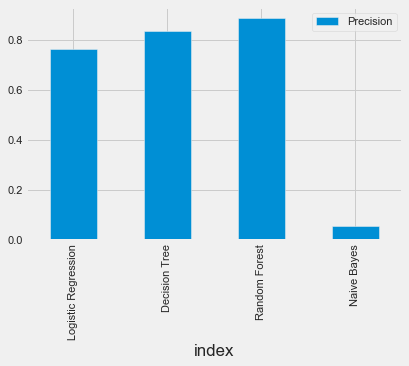

In [ ]:
# Accuracy and Cross validation score Graph
performance.reset_index().plot(x='index' ,y=['Precision'],kind='bar')

In [ ]:
# Since we had imbalance in the dataset. We decided the best model based on Precision